In [19]:
import os
import sys
sys.path.append('../')
import numpy as np
import json
import matplotlib.pyplot as plt
from utils.utils_plot import get_label, get_color

%matplotlib inline

In [20]:
snrs = [20, 40, 60, 80, 100, 150, 200]
methods = {
    'Unrolled_ADMM_Gaussian(8)':('-', 1, 4.5), 
    'Unrolled_ADMM_Gaussian(8)_No_SubNet':(':', 1, 2.7), 
    'ADMMNet':('--', 1, 2.7),
    'Unrolled_ADMM_Gaussian(8)_MSE':('-', 1, 2.7), 
    'Unrolled_ADMM_Gaussian(8)_Shape':('-.', 1, 2.7), 
}
labels = ['Proposed Method', 'No SubNet', 'ADMMNet-style Training', 'MSE Loss', 'Shape Loss']
colors = ['xkcd:purple', 'xkcd:purple', 'xkcd:navy blue', 'xkcd:aqua', 'xkcd:aqua']
results_path = '../results_200/'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


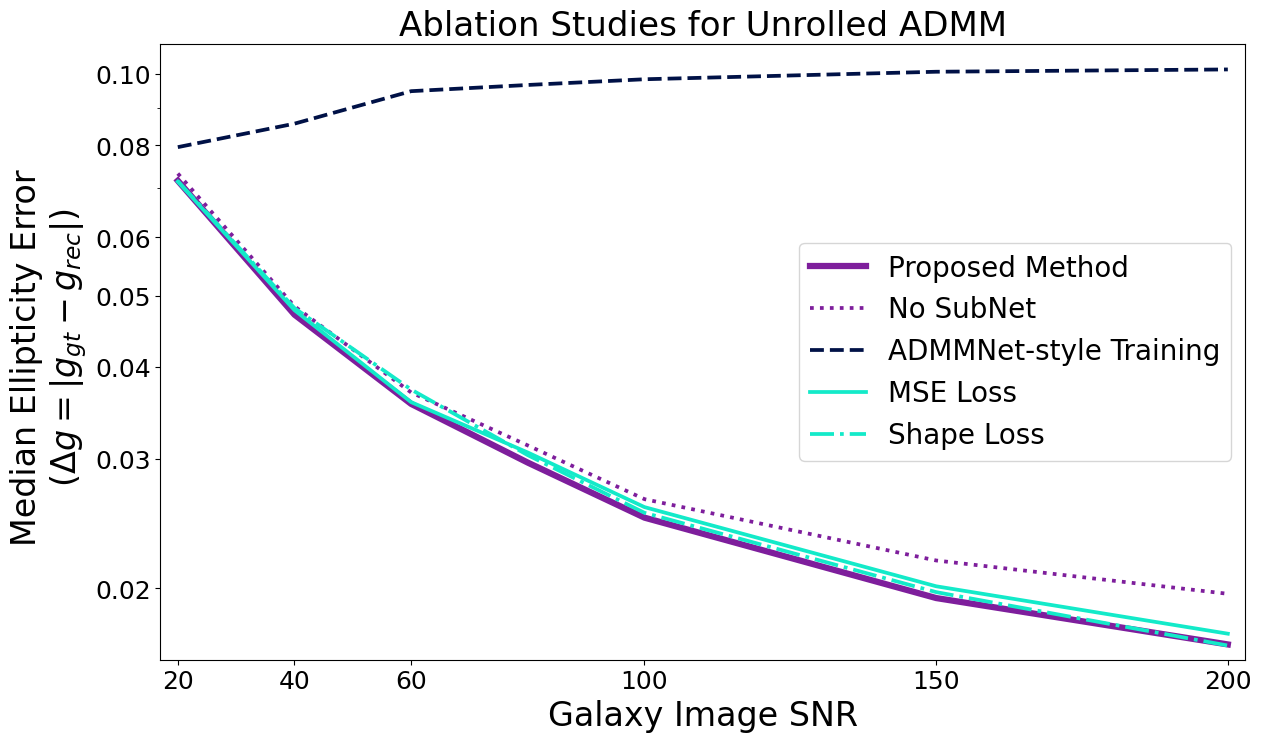

In [21]:
fig, ax1 = plt.subplots(figsize=(14,8), facecolor='white')

results_file = os.path.join(results_path, 'No_Deconv', f'results.json')
with open(results_file, 'r') as f:
    results = json.load(f)
gt_shear = {}
for snr in snrs:
    gt_shear = np.array(results[str(snr)]['gt_shear'])
        
for method, label, color in zip(methods, labels, colors):
    g_errs, g_stds = [], []
    
    results_file = os.path.join(results_path, method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    
    for snr in snrs:
        rec_shear = np.array(results[str(snr)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear)
            
        rec_err = np.minimum(rec_err, np.ones_like(rec_err))
        g_errs.append(np.median(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
    # color = get_color(method)
    if methods[method][1] == 1:
        # label = get_label(method)
        ax1.plot(snrs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1])
    else:
        ax1.plot(snrs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1])

ax1.set_yscale('log', base=10)
ax1.set_ylim(0.016,0.11)
ax1.set_yticks([0.02,0.03,0.04,0.05,0.06,0.08, 0.1])
ax1.set_yticklabels(['0.02','0.03','0.04','0.05','0.06','0.08', '0.10'])
ax1.set_ylabel('Median Ellipticity Error \n ($\Delta g=|g_{gt} - g_{rec}|$)', fontsize=24)

ax1.set_xlim([17, 203])
# ax1.set_xscale('log')
ax1.set_xticks([20,40,60,100,150,200])
ax1.set_xticklabels(['20','40','60','100','150','200'])
ax1.set_xlabel('Galaxy Image SNR', fontsize=24)

plt.legend(fontsize=20)
plt.tick_params(labelsize=18)
plt.title('Ablation Studies for Unrolled ADMM', fontsize=24.5)

plt.savefig('ablation.eps', bbox_inches='tight')
plt.savefig('ablation.jpg', bbox_inches='tight')